In [21]:
import requests
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup

url = 'https://weather.gc.ca/canada_e.html'
response = requests.get(url)
response

<Response [200]>

In [72]:
soup = BeautifulSoup(response.text, 'lxml')
data = soup.select('tbody tr td')
city_info = []
for city in data:
    city_info.append(city.text)

city = city_info[0::3]
condition = city_info[1::3]
temperature = city_info[2::3]

df = pd.DataFrame({'City': city, 'Condition': condition, 'Temperature': temperature})
df = df.set_index('City')
df = df.iloc[:20]
df

,Condition,Temperature
City,,
Calgary,Mostly Cloudy,1°C
Charlottetown,Cloudy,-1°C
Edmonton,,-3°C
Fredericton,Cloudy,2°C
Halifax,Partly Cloudy,1°C
Iqaluit,Mostly Cloudy,-14°C
Montréal,Light Snowshower,0°C
Ottawa (Kanata - Orléans),Cloudy,-1°C
Prince George,Mainly Sunny,10°C


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Calgary to Yellowknife
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Condition    20 non-null     object
 1   Temperature  20 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [74]:
df['Temperature'] = df['Temperature'].str[0:-2].astype(int)

<Axes: ylabel='City'>

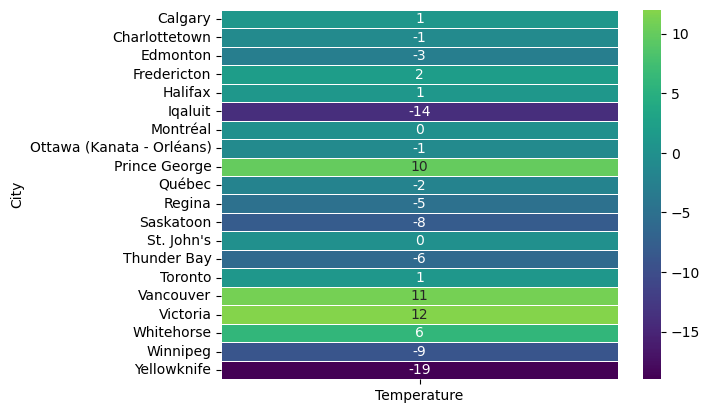

In [78]:
sns.heatmap(df.drop('Condition', axis=1), annot=True, cmap='viridis', linewidths=0.5, center=0)

Text(0, 0.5, 'Count')

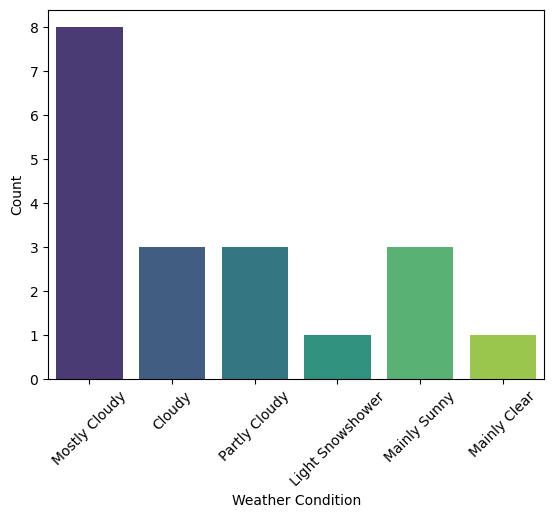

In [96]:
import matplotlib.pyplot as plt
plt.xticks(rotation=45)
sns.countplot(data=df[df['Condition'] != ""], x='Condition', palette='viridis')
plt.xlabel('Weather Condition')
plt.ylabel('Count')